# train, test set 나누기

캐글에 주피터 노트북이 올라가지않는 불상사!!!<br>
이번 주제는 주피터 노드북을 재실행해서 평가를 한다고 하였으나, Submission csv파일을 찾을 수 없다고 나왔다.   
문장유사도를 `자카드 스코어`로 계산하기에 실제로 정답을 알고있는 train set을 나눠서 자체 평가를 매기기로 하였다.

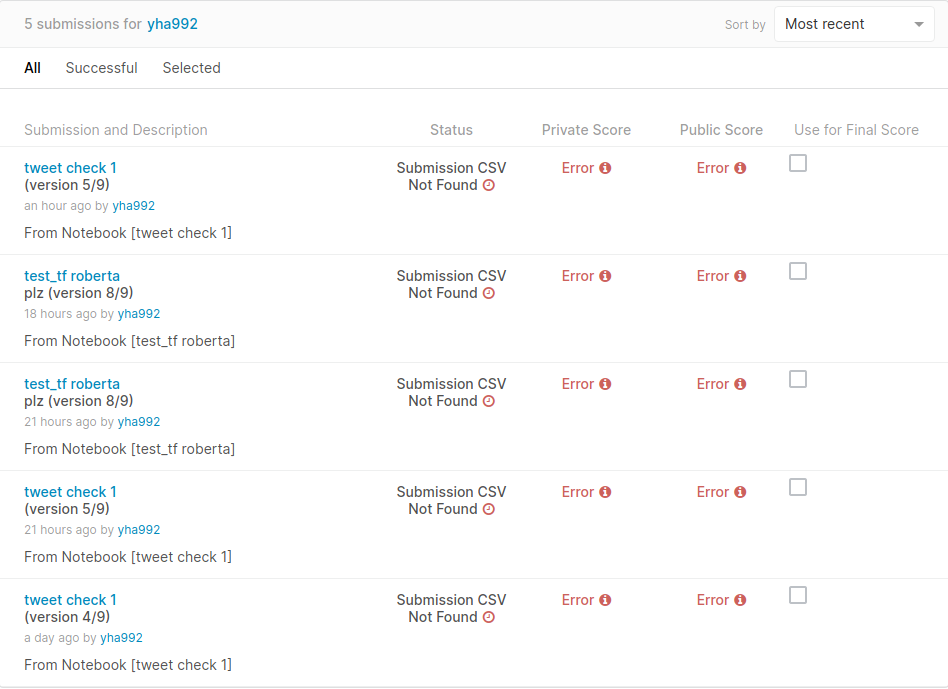

In [1]:
from IPython.display import Image
Image('./image/omg.png')

업로드에도 꽤 긴 시간이 드는데 결과는 모두 실패...

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')
print('Training data shape: ', train.shape)

Training data shape:  (27481, 4)


In [4]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### 결측치 제거

In [5]:
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [6]:
train.dropna(axis = 0, how ='any',inplace=True)

In [7]:
train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [8]:
print("train:\n", train.sentiment.value_counts(),'\n')
print("\n감정별 %:\n", train.sentiment.value_counts(normalize=True))

train:
 neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64 


감정별 %:
 neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64


원본 데이터는 감정이 `neutral` 40%, `positive` 31%, `negative` 29%로 나눠져있습니다.

### train test 나누기

In [9]:
X_train, X_test = train_test_split(train, test_size=0.2, random_state=123)

In [10]:
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (21984, 4)
Testing data shape:  (5496, 4)


0.2비율로 나뉘었고 21984, 5496의 데이터를 가지게 되었습니다.

In [11]:
X_train.head()

,textID,text,selected_text,sentiment
1011,b7797a8477,I created my account just to get a chance to ...,: I ADMIRE YOU! you`re amazing! you inspire me...,positive
21216,cbdb23868f,too kind Jim too kind brother,kind,positive
3042,69879e6134,"Oh, I`ve just watched the third episode of JON...",it`s awesome.,positive
23112,169ca458b0,GrimeStopper loss client lost their job so we...,GrimeStopper loss client lost their job so we...,neutral
6566,0dbaca8e07,goood,goood,positive


In [12]:
X_test.head()

,textID,text,selected_text,sentiment
21397,85a02242e3,"Its been a slow day at home, one of my kids is...","Its been a slow day at home, one of my kids is...",neutral
16948,a0e0ed4311,about to head to Starbucks. was gonna take the...,missed,negative
5040,f5f2a709ca,I like them. I mean I like what`s left of them.,I like them.,positive
4184,064985c587,Grad present photos on facebook,Grad present photos on facebook,neutral
9257,5ab37ce023,"That`s kinda cute, to be honest","kinda cute, to be honest",positive


In [13]:
print("X_train:\n", X_train.sentiment.value_counts())
print("\n감정별 %:\n", X_train.sentiment.value_counts(normalize=True))

X_train:
 neutral     8919
positive    6838
negative    6227
Name: sentiment, dtype: int64

감정별 %:
 neutral     0.405704
positive    0.311044
negative    0.283251
Name: sentiment, dtype: float64


In [14]:
print("X_test:\n", X_test.sentiment.value_counts())
print("\n감정별 %:\n", X_test.sentiment.value_counts(normalize=True))

X_test:
 neutral     2198
positive    1744
negative    1554
Name: sentiment, dtype: int64

감정별 %:
 neutral     0.399927
positive    0.317322
negative    0.282751
Name: sentiment, dtype: float64


train, test 둘다 비슷한 비율을 가지고 있기에 저장하겠습니다.

In [15]:
X_train.to_csv('train_split.csv',index=False)

In [16]:
X_test.to_csv('test_split.csv',index=False)

In [17]:
save_train = pd.read_csv('train_split.csv')
save_train

,textID,text,selected_text,sentiment
0,b7797a8477,I created my account just to get a chance to ...,: I ADMIRE YOU! you`re amazing! you inspire me...,positive
1,cbdb23868f,too kind Jim too kind brother,kind,positive
2,69879e6134,"Oh, I`ve just watched the third episode of JON...",it`s awesome.,positive
3,169ca458b0,GrimeStopper loss client lost their job so we...,GrimeStopper loss client lost their job so we...,neutral
4,0dbaca8e07,goood,goood,positive
...,...,...,...,...
21979,cfbec13b5d,"_dam haha, that would be cool. brianna and i s...","haha, that would be cool.",positive
21980,dc582b9f85,YAY!! that`s so cool aww that woulda been sw...,! I`m just glad,positive
21981,1d36d815e9,i knoww she is da best!,a best,positive
21982,a0d6b5cd94,**** the day flies when u got 3647 things to d...,**** the day flies when u got 3647 things to d...,negative


In [18]:
save_test = pd.read_csv('test_split.csv')
save_test

,textID,text,selected_text,sentiment
0,85a02242e3,"Its been a slow day at home, one of my kids is...","Its been a slow day at home, one of my kids is...",neutral
1,a0e0ed4311,about to head to Starbucks. was gonna take the...,missed,negative
2,f5f2a709ca,I like them. I mean I like what`s left of them.,I like them.,positive
3,064985c587,Grad present photos on facebook,Grad present photos on facebook,neutral
4,5ab37ce023,"That`s kinda cute, to be honest","kinda cute, to be honest",positive
...,...,...,...,...
5491,9e951e5565,Aw! Tear! I feel special to da family. Haha t...,Aw! Tear! I feel special to da family. Haha t...,positive
5492,ebc1e3bcb6,Yes PM PM you are right,you are right,positive
5493,eefc505b2b,self-portrait week http://unbecominglily.blogs...,self-portrait week http://unbecominglily.blogs...,neutral
5494,7f392f9c06,The time is not my friend today,The time is not my friend today,negative
